In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/CharacterLevelData/Characters.csv')

In [3]:
df.head()

,Id,Gender,Nickname,SkinUrl,Level,Profession,World,Guild,GuildId,PlayerId
0,363513,Male,Akceleratywny,www.margonem.pl/obrazki/postacie/woj/10/m_woj0...,180,Wojownik,Aldous,NaN,0,774087
1,363512,Male,Grzmotopędzik,www.margonem.pl/obrazki/postacie/woj/10/m_woj0...,210,Wojownik,Aldous,NaN,0,774087
2,381483,Male,odbijesechryzie,www.margonem.pl/obrazki/postacie/paid/grzyb_ou...,188,Mag,Aldous,NaN,0,774087
3,51462,Male,Socjopalista,www.margonem.pl/obrazki/postacie/woj/10/m_woj0...,290,Wojownik,Aldous,NaN,0,774087
4,48164,Male,Szczurołapek,www.margonem.pl/obrazki/postacie/paid/grzyb_ou...,300,Tancerz ostrzy,Aldous,NaN,0,774087


In [4]:
len(df['Profession'].unique())

6

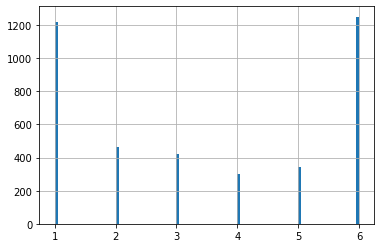

In [5]:
gb = df.groupby('SkinUrl')['Profession'].unique().str.len().hist(bins=100)

Some skins can be used for more than one character class

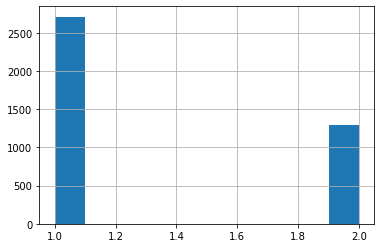

In [6]:
df.groupby('SkinUrl')['Gender'].unique().str.len().hist()

Some skins can be used by both genders.

In [7]:
gb = df.groupby('SkinUrl')['Profession'].value_counts()
gb = gb / df.groupby('SkinUrl')['Profession'].count()
skin_class_encodings = gb.unstack(level=1).fillna(0.0)
skin_class_encodings.head()

Profession,Mag,Paladyn,Tancerz ostrzy,Tropiciel,Wojownik,Łowca
SkinUrl,,,,,,
www.margonem.pl/obrazki/postacie/bd/10/f_bd09.gif,0.0,0.0,0.999369,0.0,0.000631,0.0
www.margonem.pl/obrazki/postacie/bd/10/f_bd18.gif,0.0,0.0,1.000000,0.0,0.000000,0.0
www.margonem.pl/obrazki/postacie/bd/10/m_bd01.gif,0.0,0.0,1.000000,0.0,0.000000,0.0
www.margonem.pl/obrazki/postacie/bd/10/m_bd04.gif,0.0,0.0,0.999824,0.0,0.000176,0.0
www.margonem.pl/obrazki/postacie/bd/100/f_bd04.gif,0.0,0.0,1.000000,0.0,0.000000,0.0


In [8]:
gb = df.groupby('SkinUrl')['Gender'].value_counts()
gb = gb / df.groupby('SkinUrl')['Gender'].count()
skin_gender_encodings = gb.unstack(level=1).fillna(0.0)
skin_gender_encodings.head()

Gender,Female,Male
SkinUrl,,
www.margonem.pl/obrazki/postacie/bd/10/f_bd09.gif,1.0,0.0
www.margonem.pl/obrazki/postacie/bd/10/f_bd18.gif,1.0,0.0
www.margonem.pl/obrazki/postacie/bd/10/m_bd01.gif,0.0,1.0
www.margonem.pl/obrazki/postacie/bd/10/m_bd04.gif,0.0,1.0
www.margonem.pl/obrazki/postacie/bd/100/f_bd04.gif,1.0,0.0


In [9]:
skin_gender_encodings[(skin_gender_encodings['Female'] != 1.0) & (skin_gender_encodings['Female'] != 0.0)]

Gender,Female,Male
SkinUrl,,
www.margonem.pl/obrazki/postacie/crimson/wf.gif,0.995851,0.004149
www.margonem.pl/obrazki/postacie/noob/bm.gif,0.000109,0.999891
www.margonem.pl/obrazki/postacie/noob/hm.gif,0.000049,0.999951
www.margonem.pl/obrazki/postacie/noob/mm.gif,0.000024,0.999976
www.margonem.pl/obrazki/postacie/paid-new/bdf01.gif,0.612069,0.387931
...,...,...
www.margonem.pl/obrazki/postacie/vip/arraf.gif,0.250000,0.750000
www.margonem.pl/obrazki/postacie/vip/otchlan_s1_d.gif,0.600000,0.400000
www.margonem.pl/obrazki/postacie/vip/otchlan_s1_m.gif,0.086538,0.913462


In [10]:
encodings = skin_gender_encodings.join(skin_class_encodings)
encodings.index = 'https://' + encodings.index
encodings

,Female,Male,Mag,Paladyn,Tancerz ostrzy,Tropiciel,Wojownik,Łowca
SkinUrl,,,,,,,,
https://www.margonem.pl/obrazki/postacie/bd/10/f_bd09.gif,1.0,0.0,0.0,0.0,0.999369,0.0,0.000631,0.0
https://www.margonem.pl/obrazki/postacie/bd/10/f_bd18.gif,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
https://www.margonem.pl/obrazki/postacie/bd/10/m_bd01.gif,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,0.0
https://www.margonem.pl/obrazki/postacie/bd/10/m_bd04.gif,0.0,1.0,0.0,0.0,0.999824,0.0,0.000176,0.0
https://www.margonem.pl/obrazki/postacie/bd/100/f_bd04.gif,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
https://www.margonem.pl/obrazki/postacie/woj/90/f_woj17.gif,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
https://www.margonem.pl/obrazki/postacie/woj/90/f_woj18.gif,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
https://www.margonem.pl/obrazki/postacie/woj/90/m_woj25.gif,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0


In [11]:
encodings.to_csv('Data/SkinLabelsEncodings.csv')

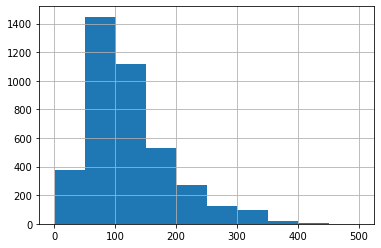

In [12]:
level_mean = df.groupby('SkinUrl')['Level'].mean()
level_mean.hist()

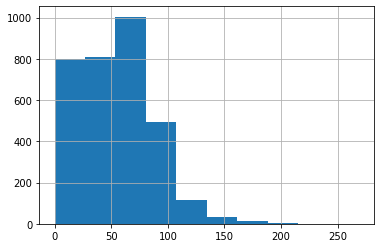

In [13]:
level_std = df.groupby('SkinUrl')['Level'].std()
level_std.hist()

In [14]:
statistics = pd.DataFrame({'LevelMean': level_mean, 'LevelStd': level_std})
statistics.head()

,LevelMean,LevelStd
SkinUrl,,
www.margonem.pl/obrazki/postacie/bd/10/f_bd09.gif,23.070618,20.493657
www.margonem.pl/obrazki/postacie/bd/10/f_bd18.gif,21.751515,18.608396
www.margonem.pl/obrazki/postacie/bd/10/m_bd01.gif,24.501012,22.965886
www.margonem.pl/obrazki/postacie/bd/10/m_bd04.gif,21.099156,18.200252
www.margonem.pl/obrazki/postacie/bd/100/f_bd04.gif,131.000000,39.908549


In [15]:
statistics.to_csv('Data/SkinStatistics.csv')